<a href="https://colab.research.google.com/github/Deepu-Pk/AI-lab/blob/main/Assignment(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

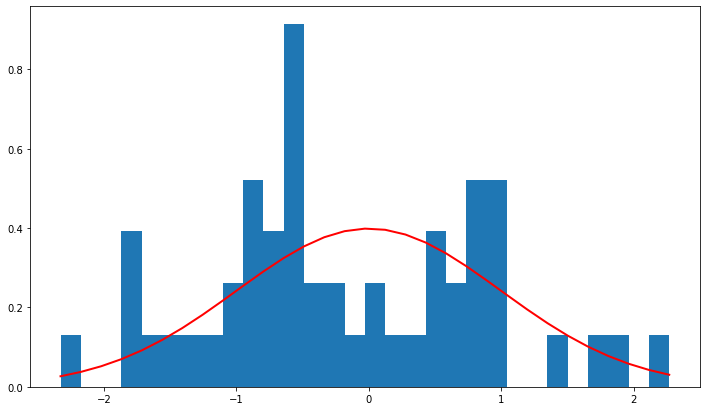

ValueError: ignored

In [1]:
#Importing all essential library
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

mean = 0
variance = 1
data = np.random.normal(mean, variance, 50)
#defining the size of the figure.
figure, ax = plt.subplots(1, figsize=(12,7))
# for plotting the histogram and making use of the bins for plotting normal distribution.
count, bins, ignored = plt.hist(data,30, density=True )
# scipy's norm function can also be used inplace of this equation.
ax.plot(bins, 1/(variance * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * variance**2) ),linewidth=2, color='r')
plt.show()


def logLikelihoodFunction(mean, variance,data):
    n= len(data)
    constant = -0.5*n*math.log(2*math.pi) - n*math.log(variance)
    remaining = 0
    for i in range(n):
        remaining += math.pow(data[i]-mean,2)/(2*math.pow(variance,2))*-1
        return constant+remaining

mu1 = np.array([2,2.5,1,0,2.1,1.7,-1,-2])
sigma1 = np.array([0,-2,1,-1,1.8,-1.6,1.5,2.8])
LogLikelihood=[] # defining a empty list for storing log likelihood

# calulating the log likelihood values of above mu1 and sigma1 for analysis
for i in range(len(mu1)):
    LogLikelihood.append(logLikelihoodFunction(mu1[i], sigma1[i], data))

fig,ax = plt.subplots(1,figsize=(11,6))
# plotting the log-likelihood values obtained above
ax.plot(np.arange(1, len(mu1)+1, 1), LogLikelihood,c="r", label="mu vs likelihood")

for i in range(len(mu1)):
    ax.annotate(" N ($\mu$={} , $\sigma$={} ) ".format(mu1[i],sigma1[i]), (i+1, LogLikelihood[i]))

plt.xlabel("Different Values of MU and SIGMA --- N(Mu,SIgma)")
plt.ylabel("Log Likelihood")
# to find which observation has the maximum log-likelihood value.
plt.axvline(np.argmax(LogLikelihood) + 1, ls='--', c='black')
# np.argmax() returns the index of the value which is the highest in the list
fig.suptitle("Plotting the log-likelihood values for different mu and sigma")
plt.show()


figure, ax = plt.subplots(1, figsize=(10,8))
count, bins, ignored = ax.hist(datapoints,30, density=True , color='yellow')
#we already proved that Maximum-Likelihood Estimate of mu is the mean of
# the measurements and for sigma = standard deviation.
estimated_mu = np.mean(datapoints)
estimated_sigma= np.std(datapoints)
# plotting the PDF of Estimated Distribution.
ax.plot(bins, norm.pdf(bins,estimated_mu,estimated_sigma),'--', lw=3.5,c='b',label='mean={} , std={} '.format(round(np.mean(datapoints), 3),
round(np.std(datapoints),3)))
ax.annotate(" Estimated Distribution", (0,0.4), c='b')
# plotting the PDF of True Distribution
ax.plot(bins, norm.pdf(bins,0,1),'-.', lw=3,c='g',label='mean={} , std={} '.format(0,1))
ax.annotate(" True Distribution", (0.7,0.3), c='g')

# plotting the PDF of all the tested mu and std values.
for i in range(len(mu1)):
    if mu1[i]!= 0 or sigma1[i]!= 1:
        ax.plot(bins, norm.pdf(bins,mu1[i],sigma1[i]),label='mean={} , std={} '.format(mu1[i], sigma1[i]))

ax.legend() # to show the legend
plt.axvline(0, ls='--', c='b') # for the vertical line passing through origin
plt.xlabel("Mean")
plt.ylabel("Normal Distribution")

figure.suptitle("Plotting for 50 sample datasets with different values of $\mu$ and $\sigma$")
plt.show()

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
fig.suptitle('Plotting the true and estimated distributions with increasing number of samples')

mu = 0
sigma = 1

# 4 arrays containing datapoints from a normal distribution
datapoints1 = np.random.normal(mu,sigma,50)
datapoints2 = np.random.normal(mu,sigma,200)
datapoints3 = np.random.normal(mu,sigma,300)
datapoints4 = np.random.normal(mu,sigma,100)
# bins and hists for 4 arrays
count1, bins1, ignored1 = ax1.hist(datapoints1,30,density=True,color='yellow')
count2, bins2, ignored2 = ax2.hist(datapoints2,30,density=True,color='yellow')
count3, bins3, ignored3 = ax3.hist(datapoints3,30,density=True,color='yellow')
count4, bins4, ignored4 = ax4.hist(datapoints4,30,density=True,color='yellow')

# estimating mu and sigma for each array of samples
estimated_mu1 = np.mean(datapoints1)
estimated_sigma1= np.std(datapoints1)
estimated_mu2 = np.mean(datapoints2)
estimated_sigma2= np.std(datapoints2)
estimated_mu3 = np.mean(datapoints3)
estimated_sigma3= np.std(datapoints3)
estimated_mu4 = np.mean(datapoints4)
estimated_sigma4= np.std(datapoints4)

#PLOTTING
# plotting the PDF of Estimated Distribution for subplot 1
ax1.plot(bins1, norm.pdf(bins1,estimated_mu1,estimated_sigma1),'--', lw=2.5,c='b',label='mean={} , std={} '.format(round(np.mean(datapoints1), 3),round(np.std(datapoints1),3)))

# plotting the PDF of True Distribution for subplot 1
ax1.plot(bins, norm.pdf(bins1,0,1),'-.', lw=2,c='r',label='mean=0, std=1')
ax1.title.set_text('50 Samples')
ax1.legend()

# plotting the PDF of Estimated Distribution for subplot 2
ax2.plot(bins2, norm.pdf(bins2,estimated_mu2,estimated_sigma2),'--', lw=2.5,c='b',label='mean={} , std={} '.format(round(np.mean(datapoints2), 3),
round(np.std(datapoints2),3)))

# plotting the PDF of True Distribution for subplot 2
ax2.plot(bins2, norm.pdf(bins2,0,1),'-.', lw=2,c='r',label='mean=0, std=1')
ax2.title.set_text('100 Samples')
ax2.legend()

# plotting the PDF of Estimated Distribution for subplot 3
ax3.plot(bins3, norm.pdf(bins3,estimated_mu3,estimated_sigma3),'--', lw=2.5,c='b',label='mean={} , std={} '.format(round(np.mean(datapoints3), 3),
round(np.std(datapoints3),3)))

# plotting the PDF of True Distribution for subplot 3
ax3.plot(bins, norm.pdf(bins1,0,1),'-.', lw=2,c='r',label='mean=0, std=1')
ax3.title.set_text('250 Samples')
ax3.legend()

# plotting the PDF of Estimated Distribution for subplot 4
ax4.plot(bins4, norm.pdf(bins4,estimated_mu4,estimated_sigma4),'--', lw=2.5,c='b',label='mean={} , std={} '.format(round(np.mean(datapoints4), 3),
round(np.std(datapoints4),3)))

# plotting the PDF of True Distribution for subplot 4.
ax4.plot(bins4, norm.pdf(bins4,0,1),'-.', lw=2,c='r',label='mean=0, std=1')
ax4.title.set_text('500 Samples')
ax4.legend()

plt.show()